# Kaggle
[kaggle 타이타닉](https://www.kaggle.com/c/titanic)

참여방법:

전처리: 허접한 단계

In [2]:
import pandas as pd
import numpy as np

In [3]:
train=pd.read_csv("titanic/train.csv")
train.shape

(891, 12)

In [4]:
test=pd.read_csv("titanic/test.csv")
test.shape

(418, 11)

In [5]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 수치데이터 이니까 기술통계를 볼 필요가 있다.
# 모델을 만드는데에 대해 승객의 생존률에 대해 PassengerId가 아무 의미가 없다
# 나이 : 관계가 있다, 어린이 먼저 하차?
# Parch: 직계가족수, parents 몇명에 child 몇명 (생존률에 관계가 크지는 않다.)
# 운임은 상당히 높다. 
# 관계가 높은것: Pclass, Age, Fare

# Fare에서 mean 이 32, 50%가 14.5 극단치가 있어 보인다.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()
#train 의 Age열에 대한 평균값으로 na를 대체하여 Age_mean열에 저장

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Age'].mean()

29.69911764705882

In [9]:
train['Age_mean']=train['Age'].fillna(train['Age'].mean())
#train['Age_mean'].fillna(train['Age'].mean(), inplace = True) #같다.

In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000


### 피처 엔지니어링 작업은 트레인데이터와 테스트데이터를 동일하게 사용해야 한다. 모델에 Age_mean이 있으면 test데이터에도 동일 column= Age_mean이 있어야한다.

In [11]:
train['Age_mean'].isnull().sum()

0

In [12]:
test['Age_mean']=test['Age']
test['Age_mean'].fillna(test['Age'].mean(), inplace=True)
test['Age_mean'].isnull().sum()

0

In [13]:
train['Sex'].value_counts()
#성별에 따른 데이터 빈도수 계산

male      577
female    314
Name: Sex, dtype: int64

In [14]:
#train에 gender 열을 추가
# train, test ['Gender']=  #female => True, male => False 저장

In [15]:
test['Gender']=train['Sex']=='female'

In [16]:
train['Gender']=train['Sex']=='female'

In [17]:
test['Gender'].value_counts() , train['Gender'].value_counts()

(False    258
 True     160
 Name: Gender, dtype: int64,
 False    577
 True     314
 Name: Gender, dtype: int64)

In [18]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train['Embarked_S']=train['Embarked']=='S'
train['Embarked_C']=train['Embarked']=='C'
train['Embarked_Q']=train['Embarked']=='Q'

In [20]:
train['Embarked_S'].sum() #644 건이 True 
train['Embarked_C'].sum() #168
train['Embarked_Q'].sum() #77

77

In [21]:
test['Embarked_S']=test['Embarked']=='S'
test['Embarked_C']=test['Embarked']=='C'
test['Embarked_Q']=test['Embarked']=='Q'

In [22]:
train['FamilySize']=train['SibSp']+train['Parch']+1 # 자신 까지 더함    이러한 작업을 feature engineering이라고 한다.
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [23]:
test['FamilySize']=test['SibSp']+test['Parch']+1

In [24]:
train['Family']=train['FamilySize']

In [25]:
test['Family']=test['FamilySize']

In [26]:
# FamilySize 값이 1이면 Family에는 S저장
# FamilySize 값이 2이상 5미만 Family에는 M저장
# FamilySize 값이 5이상 에는 L 저장

# np.where(train['FamilySize']==1, 'S', np.where((train['FamilySize'] >= 2) & (train['FamilySize'] < 5),'M','L'))

In [27]:
train.loc[train['FamilySize'] == 1, 'Family'] = 'S'
train.loc[(train['FamilySize'] >= 2) & (train['FamilySize'] < 5), 'Family'] = 'M'
train.loc[train['FamilySize'] >= 5, 'Family'] = 'L'

In [28]:
test.loc[test['FamilySize'] == 1, 'Family'] = 'S'
test.loc[(test['FamilySize'] >= 2) & (test['FamilySize'] < 5), 'Family'] = 'M'
test.loc[test['FamilySize'] >= 5, 'Family'] = 'L'

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Gender,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,False,True,False,False,2,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,True,False,True,False,2,M
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,True,True,False,False,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,True,True,False,False,2,M
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,False,True,False,False,1,S


In [30]:
train[['Family', 'FamilySize']].head()

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1


In [31]:
test[['Family', 'FamilySize']].head()

,Family,FamilySize
0,S,1
1,M,2
2,S,1
3,S,1
4,M,3


In [32]:
train['Family_S']=train['Family']=='S'
train['Family_M']=train['Family']=='M'
train['Family_L']=train['Family']=='L'

In [33]:
test['Family_S']=test['Family']=='S'
test['Family_M']=test['Family']=='M'
test['Family_L']=test['Family']=='L'

In [34]:
train['Family'].value_counts()

S    537
M    292
L     62
Name: Family, dtype: int64

In [35]:
test['Family'].value_counts()

S    253
M    145
L     20
Name: Family, dtype: int64

In [36]:
# train['Pclass'] #이건 카테고리형 데이터임 그래서 int를 범주형으로 변경
train['Pclass']=train['Pclass'].astype('category')
train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

In [41]:
#Pclass 도 나누어보기 -> Pclass_1, Pclass_2, Pclass_3   True or False
#Family_S,M,L 대신 사용해 보기
train['Pclass_1']=train['Pclass']==1
train['Pclass_2']=train['Pclass']==2
train['Pclass_3']=train['Pclass']==3

test['Pclass_1']=test['Pclass']==1
test['Pclass_2']=test['Pclass']==2
test['Pclass_3']=test['Pclass']==3

생존여부에 영향을 주는 요인
feature의 약자 fn

In [43]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [65]:
train.columns
fn=['Gender','Age_mean','Embarked_S', 'Embarked_C', 'Embarked_Q','Pclass_1', 'Pclass_2', 'Pclass_3'] #독립변수들 (입력데이터)
#family 보다는 sex, Fare 등을 추가해야됨 이건 썩 좋은 모델을 아님
xTrain=train[fn]
xTrain.head() #x data

yLabel=train['Survived'] #종속변수(출력데이터)

In [66]:
xTest=test[fn]

### 문제: xTrain, 정답: yLabel -> 모델링 ( 의사결정트리 알고리즘 ) => 모델
### 테스트 입력 데이터: xTest   -------------------------------> 입력 ======> 생존여부 출력 (예측결과)
#### 예측결과를 kaggle 서버에 제출 => 점수 및 등수 확인

# 모델링


In [73]:
from sklearn.tree import DecisionTreeClassifier
# model 객체 생성
model=DecisionTreeClassifier(max_depth=8, random_state=2020, criterion='entropy') #최대 깊이를 3으로 지정함.. 얕은 수준임. 그런데 너무 깊으면 오버 피팅
# random_state 는 seed의 개념과 같다.
# 데이터가 만약 1~10 => 8개 : 트레이닝, 2개 : 테스트 
# 동일한 난수를 발생시키기 위해서 사용
model

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2020)

In [74]:
# 모델링
model.fit(xTrain, yLabel)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2020)

In [75]:
prediction=model.predict(xTest) #생존여부를 0과 1로 나타냄 /예측 종료
prediction.shape #(418,)
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [76]:
test['Survived']=prediction
res=test[['PassengerId', 'Survived']]

In [77]:
res.to_csv("mysubmit_improve2.csv", index=False)

In [78]:
res

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,1
416,1308,0


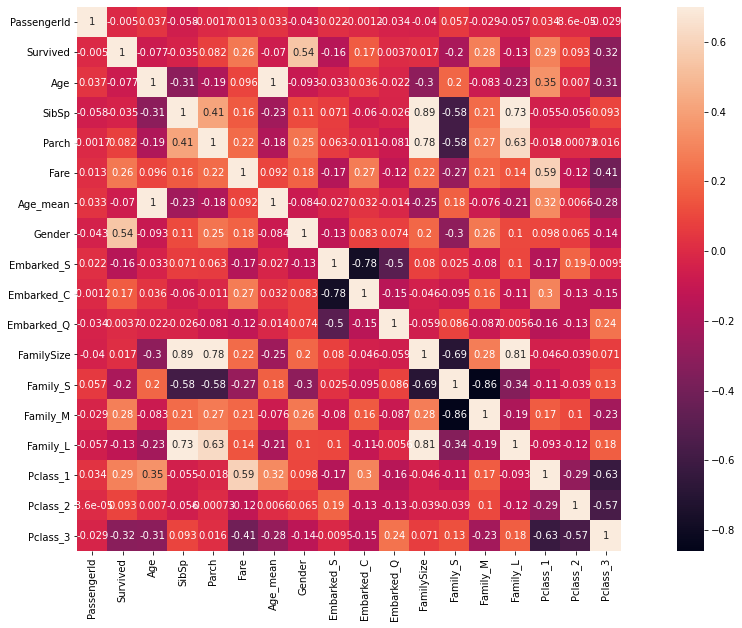

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
train_corr = train.corr()
plt.figure(figsize = (20,10))
heat = sns.heatmap(train_corr,square = True, annot = True, vmax = 0.7)